# Evaluate LR

ref: <https://www.r-bloggers.com/2015/08/evaluating-logistic-regression-models/>

In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
df=pd.read_csv('D:/NF/ML/Logistic Regression/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Handling outlier

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

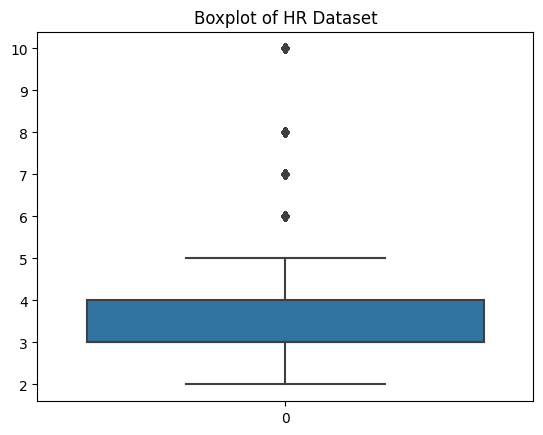

In [4]:
# Plot boxplot for each feature
sns.boxplot(data=df['time_spend_company'])
plt.title('Boxplot of HR Dataset')
plt.show()

Old Shape:  (14999, 10)
New Shape:  (14999, 10)


C:\Users\farisha.krishnan\AppData\Local\Temp\ipykernel_14188\1876945049.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['time_spend_company'], 25,
C:\Users\farisha.krishnan\AppData\Local\Temp\ipykernel_14188\1876945049.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['time_spend_company'],75,


<Axes: xlabel='time_spend_company'>

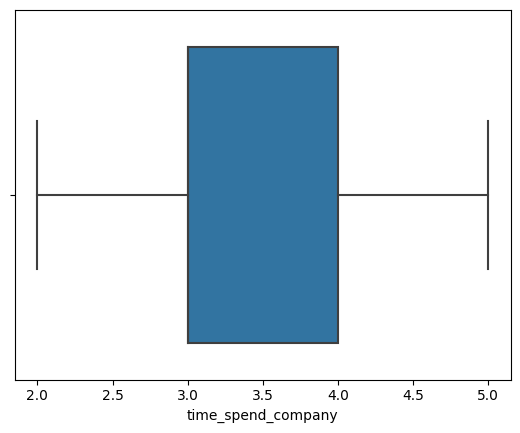

In [5]:
# handling the outliers
# Detect the outliers using IQR 

#IQR
Q1 = np.percentile(df['time_spend_company'], 25,
                   interpolation='midpoint')
Q3 = np.percentile(df['time_spend_company'],75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)


# Define outlier boundaries
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = (df['time_spend_company'] < lower_bound) | (df['time_spend_company'] > upper_bound)

# Replace outliers with the mean value of the 'SepalWidthCm' column
df.loc[outliers, 'time_spend_company'] = np.mean(df['time_spend_company'])

print("New Shape: ",df.shape)

sns.boxplot(x='time_spend_company', data=df)

## Feature Engineering

In [6]:
subdf = df[['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,3.000000,0,0,low
1,0.80,3.498233,0,0,medium
2,0.11,4.000000,0,0,medium
3,0.72,5.000000,0,0,low
4,0.37,3.000000,0,0,low


In [7]:
salary_dummies= pd.get_dummies(subdf['salary'], dtype=int) #dtypes is used to encode 0 and 1
new_df= pd.concat([subdf, salary_dummies], axis='columns')
new_df.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,salary,high,low,medium
0,0.38,3.000000,0,0,low,0,1,0
1,0.80,3.498233,0,0,medium,0,0,1
2,0.11,4.000000,0,0,medium,0,0,1
3,0.72,5.000000,0,0,low,0,1,0
4,0.37,3.000000,0,0,low,0,1,0


In [8]:
new_df.drop('salary', axis='columns', inplace=True)
new_df.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,3.000000,0,0,0,1,0
1,0.80,3.498233,0,0,0,0,1
2,0.11,4.000000,0,0,0,0,1
3,0.72,5.000000,0,0,0,1,0
4,0.37,3.000000,0,0,0,1,0


## Logistic Regression

In [9]:
X = new_df
X.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,3.000000,0,0,0,1,0
1,0.80,3.498233,0,0,0,0,1
2,0.11,4.000000,0,0,0,0,1
3,0.72,5.000000,0,0,0,1,0
4,0.37,3.000000,0,0,0,1,0


In [10]:
y= df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state=42)

In [13]:
model = LogisticRegression()

In [14]:
# modelling the Logistic Regression

model.fit(X_train, y_train)

LogisticRegression()

## Goodness of Fit

### Likelihood Ratio Test

In [15]:
import statsmodels.api as sm

In [16]:
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.406262
         Iterations 7


In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14992
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Jul 2023   Pseudo R-squ.:                  0.2598
Time:                        16:15:58   Log-Likelihood:                -6093.5
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.5187      0.094    -37.534      0.000      -3.702      -3.335
time_spend_company        0.9017      0.027     33.395      0.000       0.849       0.955
Work_accident            -1.5968      0.093    -17.146      0.000      -1.779      -1.414
promotion_last_5years    -1.2574      0.258     -4.881      0.000      -1.762      -0.753
high                     -3.5904      0.162    -22.099      0.000      -3.909      -3.272
low                      -1.7355      0.108    -16.039      0.000      -1.948      -1.523
medium                   -2.2646      0.111    -20.409      0.000      -2.482      -2.047
=========================================================================================
"""

### Pseudo R^2

In [18]:
# Calculate McFadden's R-squared

r2_mcfadden = 1- (result.llf/ result.llnull)

In [19]:
# Print McFadden's R-squared

print("McFadden's R-squared: ", r2_mcfadden)

McFadden's R-squared:  0.25980694532435145


The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

### Hosmer-Lemeshow Test

In [31]:
from scipy.stats import chi2_contingency

In [36]:
# Calculate the predicted probabilities
y_pred = result.predict(X_test)

# Divide the data into groups based on predicted probabilities
num_groups = 10
group_indices = np.array_split(np.argsort(y_pred), num_groups)

# Calculate the observed and expected frequencies
observed_pos = np.array([np.sum(y[group]) for group in group_indices])
observed_neg = np.array([group.size - np.sum(y[group]) for group in group_indices])
expected_pos = np.array([np.mean(y) * group.size for group in group_indices])
expected_neg = np.array([group.size - np.mean(y) * group.size for group in group_indices])

# Calculate the test statistic and p-value
chi_statistic, p_value = chi2_contingency(np.vstack((observed_pos, observed_neg)).T)[:2]

# Print the test statistic and p-value
print('Hosmer-Lemeshow Test:')
print('Test statistic:', chi_statistic)
print('P-value:', p_value)

Hosmer-Lemeshow Test:
Test statistic: 6.12
P-value: 0.7278506992125441


 Small values with large p-values indicate a good fit to the data while large values with p-values below 0.05 indicate a poor fit. 

## Statistical Tests for Individual Predictors

### Variable Importance

In [41]:

# Get the absolute values of the coefficients
coef_abs = np.abs(result.params)

# Calculate the percentage importance of each variable
var_importance = (coef_abs / coef_abs.sum()) * 100

# Sort the variable importance in descending order
var_importance_sorted = var_importance.sort_values(ascending=False)

# Print the variable importance
print('Variable Importance:')
print(var_importance_sorted)

Variable Importance:
high                     24.153621
satisfaction_level       23.671120
medium                   15.234247
low                      11.675090
Work_accident            10.741688
promotion_last_5years     8.458532
time_spend_company        6.065701
dtype: float64
